In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head(3)

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0


In [13]:
labels = pd.read_csv('labels.csv')

In [14]:
labels.shape

(801, 2)

In [15]:
labels.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


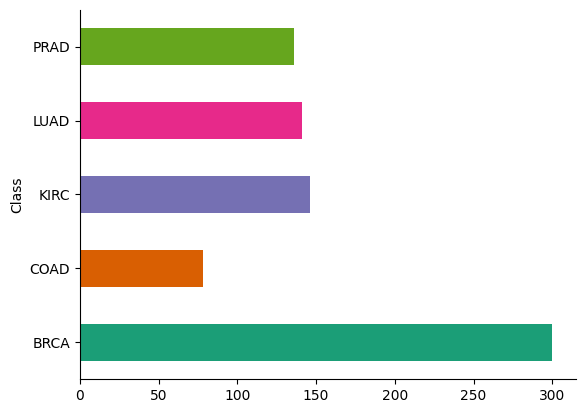

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns

# Assuming labels is your DataFrame with a column named 'Class'
labels.groupby('Class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()


# There are 5 different types of cancer in our dataset. These are 'PRAD', 'LUAD','KIRC','COAD','BRCA'. The 'BRCA' type cancer is often more than the others in our dataset.

In [17]:
merged_df = pd.merge(labels,data,on='Unnamed: 0')

In [18]:
merged_df.drop('Unnamed: 0', axis=1, inplace=True)

In [19]:
merged_df.head()


,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [20]:
merged_df.shape

(801, 20532)

In [21]:
from sklearn.decomposition import PCA

In [22]:
merged_df.drop('Class', axis=1, inplace=True)
X = merged_df.copy()
y = labels.copy()

In [23]:
X.shape


(801, 20531)

In [24]:
X.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [33]:
y.drop('Unnamed: 0', axis=1, inplace=True)


KeyError: "['Unnamed: 0'] not found in axis"

In [34]:
y

,Class
0,PRAD
1,LUAD
2,PRAD
3,PRAD
4,BRCA
...,...
796,BRCA
797,LUAD
798,COAD
799,PRAD


In [25]:
X.isnull().sum()

gene_0        0
gene_1        0
gene_2        0
gene_3        0
gene_4        0
             ..
gene_20526    0
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Length: 20531, dtype: int64

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20531 entries, gene_0 to gene_20530
dtypes: float64(20531)
memory usage: 125.5 MB


In [27]:
y.shape

(801, 2)

In [28]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Each sample has expression values for around 20K genes. However, it may not be necessary to include all 20K gene expression values to analyze each cancer type. Therefore, we will identify a smaller set of attributes which will then be used to fit multiclass classification models. So, the first task targets the dimensionality reduction using PCAA

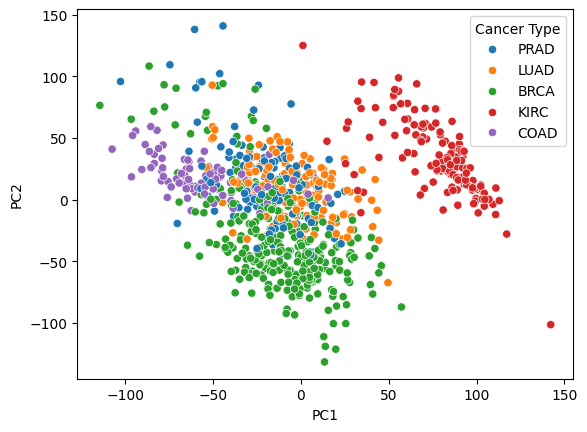

In [35]:
pca_2 = PCA(n_components=2)  # for 2D visualization
X_pca = pca_2.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Add the cancer type information back into the DataFrame
pca_df['Cancer Type'] = y

# Plot the first two principal components
sns.scatterplot(x='PC1', y='PC2', hue='Cancer Type', data=pca_df)
plt.show()


#It effectively reduces the high-dimensional data to two dimensions using PCA and provides insights into the distribution of different cancer types. The use of color to represent different cancer types allows for easy differentiation and understanding of the data.

#The plot shows there are distinct clusters formed by different cancer types, indicating that the gene expression patterns vary across different cancer types.

#Although some gnenes overlap between the clusters, the plot does not show clear separation between all cancer types

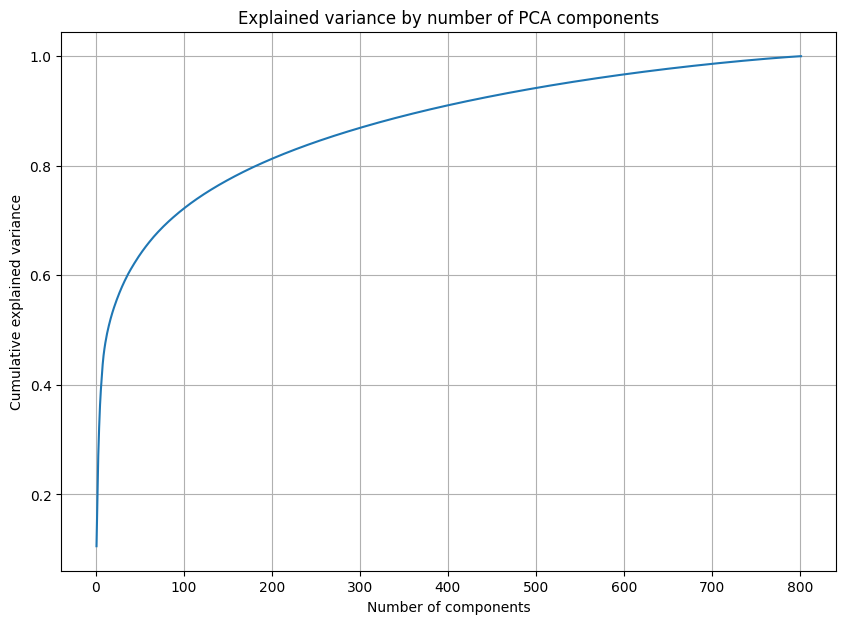

In [36]:
pca = PCA()
pca.fit(X_scaled)

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance by number of PCA components')
plt.grid(True)
plt.show()


#Cumulative Explained Variance Plot: This plot shows the cumulative sum of the explained variances for the components. The 'elbow' or point where the curve starts to level off is often used to decide how many components to keep.

#The curve starts to flatten around 150 - 200 PCs, suggesting a potential elbow point in this range.

In [37]:
# Try different numbers of PCs around the initial guess and knee point
for n_components in [50, 100 , 150, 200, 250 , 300 , 350 , 400 , 450 , 500 , 550 , 600 , 650 , 700]:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    # Repeat validation and other analyses for each PC set

    # Explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    print(f"{n_components} component :", explained_variance_ratio.sum())  # Check how much variance is captured

50 component : 0.6367417452669061
100 component : 0.7200723335229828
150 component : 0.771833004544006
200 component : 0.8102959523347624
250 component : 0.8410371293557131
300 component : 0.8667184635638481
350 component : 0.8887873446118518
400 component : 0.9081292360393975
450 component : 0.9251042040480244
500 component : 0.9402196941577767
550 component : 0.9536030466959515
600 component : 0.9654897891792746
650 component : 0.9771345840395657
700 component : 0.9861091207989123


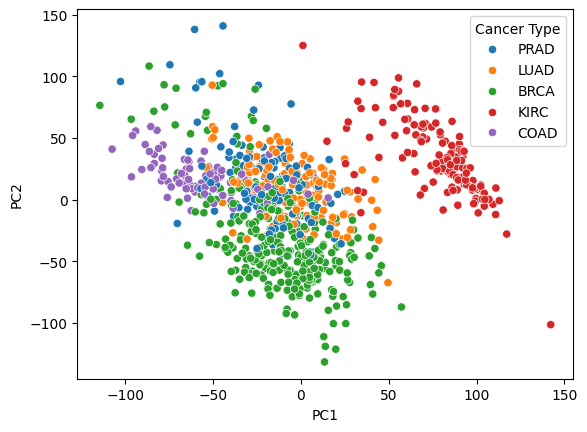

In [38]:
pca_600 = PCA(n_components=600)
X_pca600 = pca_600.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_600_df = pd.DataFrame(data=X_pca600, columns=[f'PC{i+1}' for i in range(600)])

# Add the cancer type information back into the DataFrame
pca_600_df['Cancer Type'] = y

# Plot the first two principal components
sns.scatterplot(x='PC1', y='PC2', hue='Cancer Type', data=pca_600_df)
plt.show()

# trying with 600 components which gives 96.54% of variance explaiined

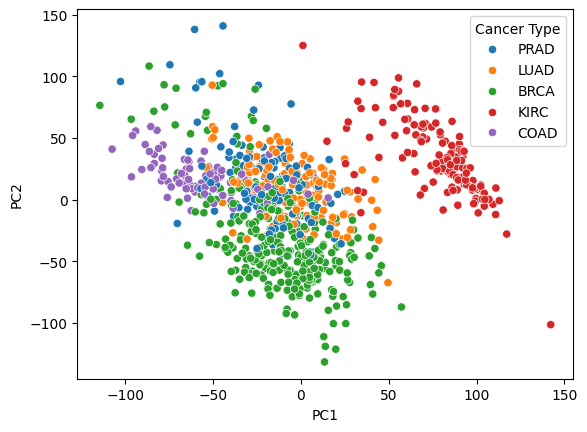

In [40]:
pca_400 = PCA(n_components=400)
X_pca400 = pca_400.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_400_df = pd.DataFrame(data=X_pca400, columns=[f'PC{i+1}' for i in range(400)])

# Add the cancer type information back into the DataFrame
pca_400_df['Cancer Type'] = y

# Plot the first two principal components
sns.scatterplot(x='PC1', y='PC2', hue='Cancer Type', data=pca_400_df)
plt.show()


# trying with 600 components which gives 90.81% of variance explaiined

In [45]:
X_pca

array([[-57.44698694,  95.41098103,  74.30154292],
       [-16.91943011,   0.73246955, -64.0728986 ],
       [-70.34521782, -19.30332641,  20.48823966],
       ...,
       [ -4.13308961,  15.69001504, -22.64445485],
       [-30.81475741,  33.52642274,  70.56563551],
       [-22.34455664,   4.05235666,  32.32787498]])

In [48]:
print("Principal Components:")
for i in range(pca.components_.shape[0]):
    print(f"PC{i+1}:", pca.components_[i])

# Print explained variance ratios
print("\nExplained Variance Ratios:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.4f}")


Principal Components:
PC1: [ 0.00097941 -0.00235639 -0.00496579 ...  0.00233708  0.00195967
  0.00104891]
PC2: [ 0.00230787 -0.00637287  0.00046648 ... -0.01493974 -0.00232062
  0.00100493]
PC3: [-0.00025614  0.00145302  0.00602132 ...  0.00300221  0.00704655
 -0.00215189]
PC4: [-9.15022505e-05  9.26212709e-03  5.78623751e-03 ...  6.11102160e-03
 -9.53220721e-03 -1.26137490e-03]
PC5: [-0.00121488 -0.01306564 -0.0146611  ... -0.00165593 -0.00348604
 -0.0034526 ]
PC6: [-0.00074411 -0.01012089 -0.00645937 ...  0.00429635  0.0002488
  0.00262628]
PC7: [-0.00064256  0.0061439   0.00456564 ...  0.01146941  0.00085967
  0.0035848 ]
PC8: [-0.00148073 -0.01118601 -0.00799738 ... -0.00029787  0.00891666
 -0.0036607 ]
PC9: [0.00047948 0.00524056 0.00203942 ... 0.00285497 0.00075435 0.00290084]
PC10: [-0.00016695  0.00256949  0.00265852 ... -0.00041306  0.01196391
 -0.00088588]
PC11: [ 0.00022291  0.0030396   0.00273029 ... -0.00440927 -0.00102494
  0.00926544]
PC12: [-0.00077264  0.00024366 -0.00

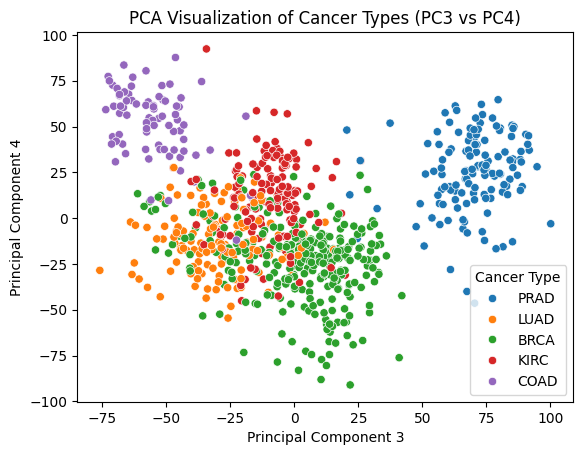

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X_scaled contains your scaled feature matrix and y contains the labels
pca = PCA(n_components=4)  # We only need 4 components for PC1, PC2, PC3, and PC4
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Add the cancer type information back into the DataFrame
pca_df['Cancer Type'] = y

# Plot the third and fourth principal components
sns.scatterplot(x='PC3', y='PC4', hue='Cancer Type', data=pca_df)
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
plt.title('PCA Visualization of Cancer Types (PC3 vs PC4)')
plt.legend(title='Cancer Type')
plt.show()


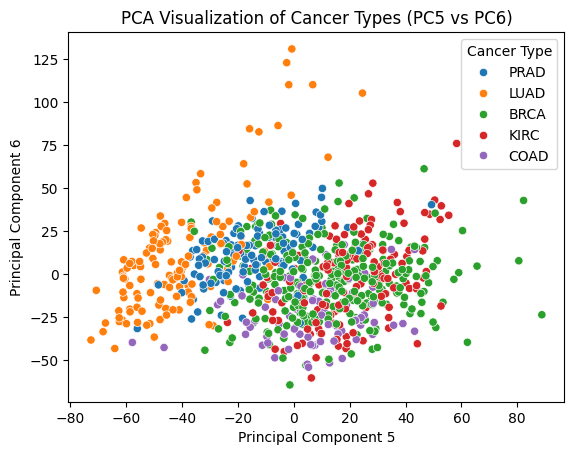

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X_scaled contains your scaled feature matrix and y contains the labels

# Perform PCA with 6 components
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Add the cancer type information back into the DataFrame
pca_df['Cancer Type'] = y

# Plot the fifth and sixth principal components
sns.scatterplot(x='PC5', y='PC6', hue='Cancer Type', data=pca_df)
plt.xlabel('Principal Component 5')
plt.ylabel('Principal Component 6')
plt.title('PCA Visualization of Cancer Types (PC5 vs PC6)')
plt.legend(title='Cancer Type')
plt.show()


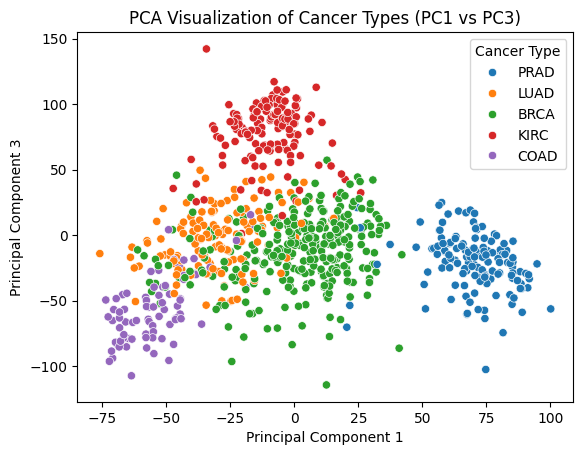

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X_scaled contains your scaled feature matrix and y contains the labels

# Perform PCA with 6 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Add the cancer type information back into the DataFrame
pca_df['Cancer Type'] = y

# Plot the fifth and sixth principal components
sns.scatterplot(x='PC3', y='PC1', hue='Cancer Type', data=pca_df)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.title('PCA Visualization of Cancer Types (PC1 vs PC3)')
plt.legend(title='Cancer Type')
plt.show()
